In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#### dataset

In [6]:
dataset = pd.read_csv('iris.csv')
X = dataset[['sepal_length', 'sepal_width', 'petal_length']].values
y = dataset['class'].values

In [7]:
dataset.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

####  regression_logistique

In [9]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0, solver='lbfgs', multi_class='auto')

#### One Versus Rest approche

In [10]:
# feature scaling 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [11]:
def ovr_y (class_name) : 
    return np.where(y_train == class_name , 1, 0) , np.where(y_test == class_name, 1, 0)

In [12]:
classnames = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']
ovr_probabilities = []

for class_name in classnames:
    ovr_y_train, ovr_y_test = ovr_y(class_name)
    
    classifier.fit(X_train, ovr_y_train)
    
    probs_y = classifier.predict_proba(X_test)[:, 1]
    
    ovr_probabilities.append(probs_y)


ovr_probabilities

[array([8.98815798e-03, 9.56696897e-01, 1.69910415e-05, 1.87045018e-02,
        2.46135513e-03, 9.34542228e-01, 1.12842190e-01, 3.42054768e-03,
        1.64250201e-03, 3.19686027e-02, 8.95549746e-03, 9.29844857e-01,
        9.55576878e-01, 9.29784928e-01, 9.87476680e-01, 2.86509673e-02,
        1.88879355e-03, 2.45411935e-02, 2.26801013e-02, 1.60265044e-03,
        9.56130723e-01, 1.24703882e-02, 9.60354391e-01, 1.60265044e-03,
        9.09406441e-04, 3.07586566e-03, 2.98973221e-04, 1.83069863e-03,
        9.29844857e-01, 9.31684178e-01]),
 array([0.47356495, 0.0485197 , 0.70111196, 0.39719044, 0.52670152,
        0.13091124, 0.37954581, 0.32020259, 0.8435394 , 0.53415323,
        0.23703809, 0.28720601, 0.10509199, 0.2359921 , 0.04101283,
        0.18237945, 0.34852944, 0.65862698, 0.44537018, 0.48431974,
        0.17738759, 0.33185646, 0.11677718, 0.48431974, 0.07219671,
        0.3706414 , 0.70966042, 0.24595923, 0.28720601, 0.22942111]),
 array([4.05974544e-01, 6.65488634e-04, 9.90

In [13]:
prediction = []

for i in range(len(ovr_probabilities[0])):
    max_index = np.argmax([ovr_probabilities[j][i] for j in range(3)])    
    prediction.append(classnames[max_index])

prediction



['Iris-versicolor',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-setosa',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-versicolor',
 'Iris-versicolor',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-virginica',
 'Iris-setosa',
 'Iris-setosa']

In [14]:
res = "{:<10}     |  {:<10}  | {:<10}    | {:<13}    | {:<5}".format("y_test", "y_pred", "Setosa(%)", "versicolor(%)", "virginica(%)\n")
res += "-"*65+"\n"
res += "\n".join("{:<10} | {:<10} | {:<10} | {:<13} |  {:<10}".format(x, y, a, b, c) for x, y, a, b, c in zip(y_test, prediction, ovr_probabilities[0], ovr_probabilities[1], ovr_probabilities[2]))
res += "\n"+"-"*65+"\n"
print(res)

y_test         |  y_pred      | Setosa(%)     | versicolor(%)    | virginica(%)
-----------------------------------------------------------------
Iris-versicolor | Iris-versicolor | 0.008988157980320806 | 0.4735649504219366 |  0.40597454447004305
Iris-setosa | Iris-setosa | 0.9566968969508061 | 0.04851969648496181 |  0.0006654886335668798
Iris-virginica | Iris-virginica | 1.6991041494734583e-05 | 0.7011119636796543 |  0.9903167310172374
Iris-versicolor | Iris-versicolor | 0.0187045018232133 | 0.3971904408075547 |  0.2966549236570513
Iris-versicolor | Iris-versicolor | 0.002461355129482885 | 0.5267015215327135 |  0.4766893476206377
Iris-setosa | Iris-setosa | 0.9345422277120139 | 0.13091124270149693 |  0.0004893269577784966
Iris-versicolor | Iris-versicolor | 0.11284219014232263 | 0.37954581196805304 |  0.05444794139185312
Iris-virginica | Iris-virginica | 0.0034205476848793645 | 0.32020259460310746 |  0.6106384295430802
Iris-versicolor | Iris-versicolor | 0.0016425020058192141 | 0.8435

In [15]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, prediction)
print(cm)

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


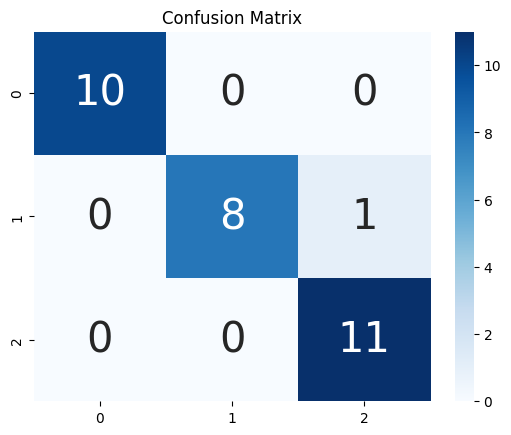

In [16]:
# Plot confusion matrix
import seaborn as sns
import pandas as pd
# confusion matrix sns heatmap 
## https://www.kaggle.com/agungor2/various-confusion-matrix-plots
ax = plt.axes()
df_cm = cm
sns.heatmap(df_cm, annot=True, annot_kws={"size": 30}, fmt='d',cmap="Blues", ax = ax )
ax.set_title('Confusion Matrix')
plt.show()